In [1]:
import torch
torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np  
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=300

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
class Encoder(nn.Module):
    def __init__(self, latent_dims):
        super(Encoder, self).__init__()
        
        # 784 -> 512
        self.linear1 = nn.Linear(784, 512)
        
        # 512 -> 256
        self.linear2 = nn.Linear(512, 256)
        
        # 256 -> 128
        self.linear3 = nn.Linear(256, 128)
        
        # 128 -> latent_dims
        self.linear4 = nn.Linear(128, latent_dims)

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        
        x = F.gelu(self.linear1(x))
        x = F.gelu(self.linear2(x))
        x = F.gelu(self.linear3(x))
        
        return self.linear4(x)

In [4]:
class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        
        # latent_dims -> 128
        self.linear1 = nn.Linear(latent_dims, 128)
        
        # 128 -> 256
        self.linear2 = nn.Linear(128, 256)
        
        # 256 -> 512
        self.linear3 = nn.Linear(256, 512)
        
        # 512 -> 784
        self.linear4 = nn.Linear(512, 784)

    def forward(self, z):
        z = F.gelu(self.linear1(z))
        z = F.gelu(self.linear2(z))
        z = F.gelu(self.linear3(z))
        z = torch.sigmoid(self.linear4(z))
        
        return z.reshape((-1, 1, 28, 28))

In [5]:
class Autoencoder(nn.Module):
    def __init__(self,latent_dims):
        super(Autoencoder, self).__init__()
        self.encoder=Encoder(latent_dims)
        self.decoder=Decoder(latent_dims)

    def forward(self,x):
        z=self.encoder(x)
        return self.decoder(z)

In [6]:
def train(autoencoder,data,epochs=20):
    opt=torch.optim.Adam(autoencoder.parameters())
    for epoch in range(epochs):
        for x,y in data:
            x=x.to(device)
            opt.zero_grad()
            x_hat=autoencoder(x)
            loss=((x-x_hat)**2).sum()
            loss.backward()
            opt.step()
    return autoencoder

In [7]:
latent_dims=2
autoencoder=Autoencoder(latent_dims).to(device)

data=torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./data/',
                               transform=torchvision.transforms.ToTensor(),
                               download=True
                               ),
    batch_size=128,
    shuffle=True,
)


In [8]:
autoencoder=train(autoencoder,data)

In [9]:
len(data)

469

In [10]:
# Extract one batch of data
batch_data, batch_labels = next(iter(data))

# Print the shape of the batch data
print(batch_data.shape)
print(batch_labels.shape)
print(batch_labels)

torch.Size([128, 1, 28, 28])
torch.Size([128])
tensor([8, 7, 6, 2, 7, 5, 8, 1, 7, 1, 2, 5, 9, 7, 3, 3, 5, 8, 7, 8, 2, 4, 9, 6,
        0, 2, 0, 2, 8, 3, 0, 9, 1, 0, 3, 3, 3, 7, 2, 8, 7, 1, 4, 3, 4, 5, 2, 3,
        1, 0, 7, 5, 6, 0, 7, 5, 2, 2, 9, 9, 7, 6, 5, 0, 6, 3, 6, 9, 7, 3, 9, 4,
        1, 2, 6, 4, 6, 3, 8, 7, 2, 8, 0, 9, 8, 8, 0, 4, 9, 1, 4, 6, 9, 7, 5, 9,
        3, 2, 7, 6, 0, 8, 6, 4, 2, 8, 1, 8, 3, 1, 1, 4, 0, 6, 9, 0, 1, 2, 9, 8,
        1, 8, 7, 7, 9, 7, 1, 0])


In [11]:
def plot_latent(autoencoder,data,num_batches=1000):
    for i, (x,y) in enumerate(data):
        z=autoencoder.encoder(x.to(device))
         # 打印z的形状
        #print(z.shape)
        z=z.to('cpu').detach().numpy()
        plt.scatter(z[:,0],z[:,1],c=y,cmap='tab10')
        if i>num_batches:
            print(i)
            plt.colorbar()
            break

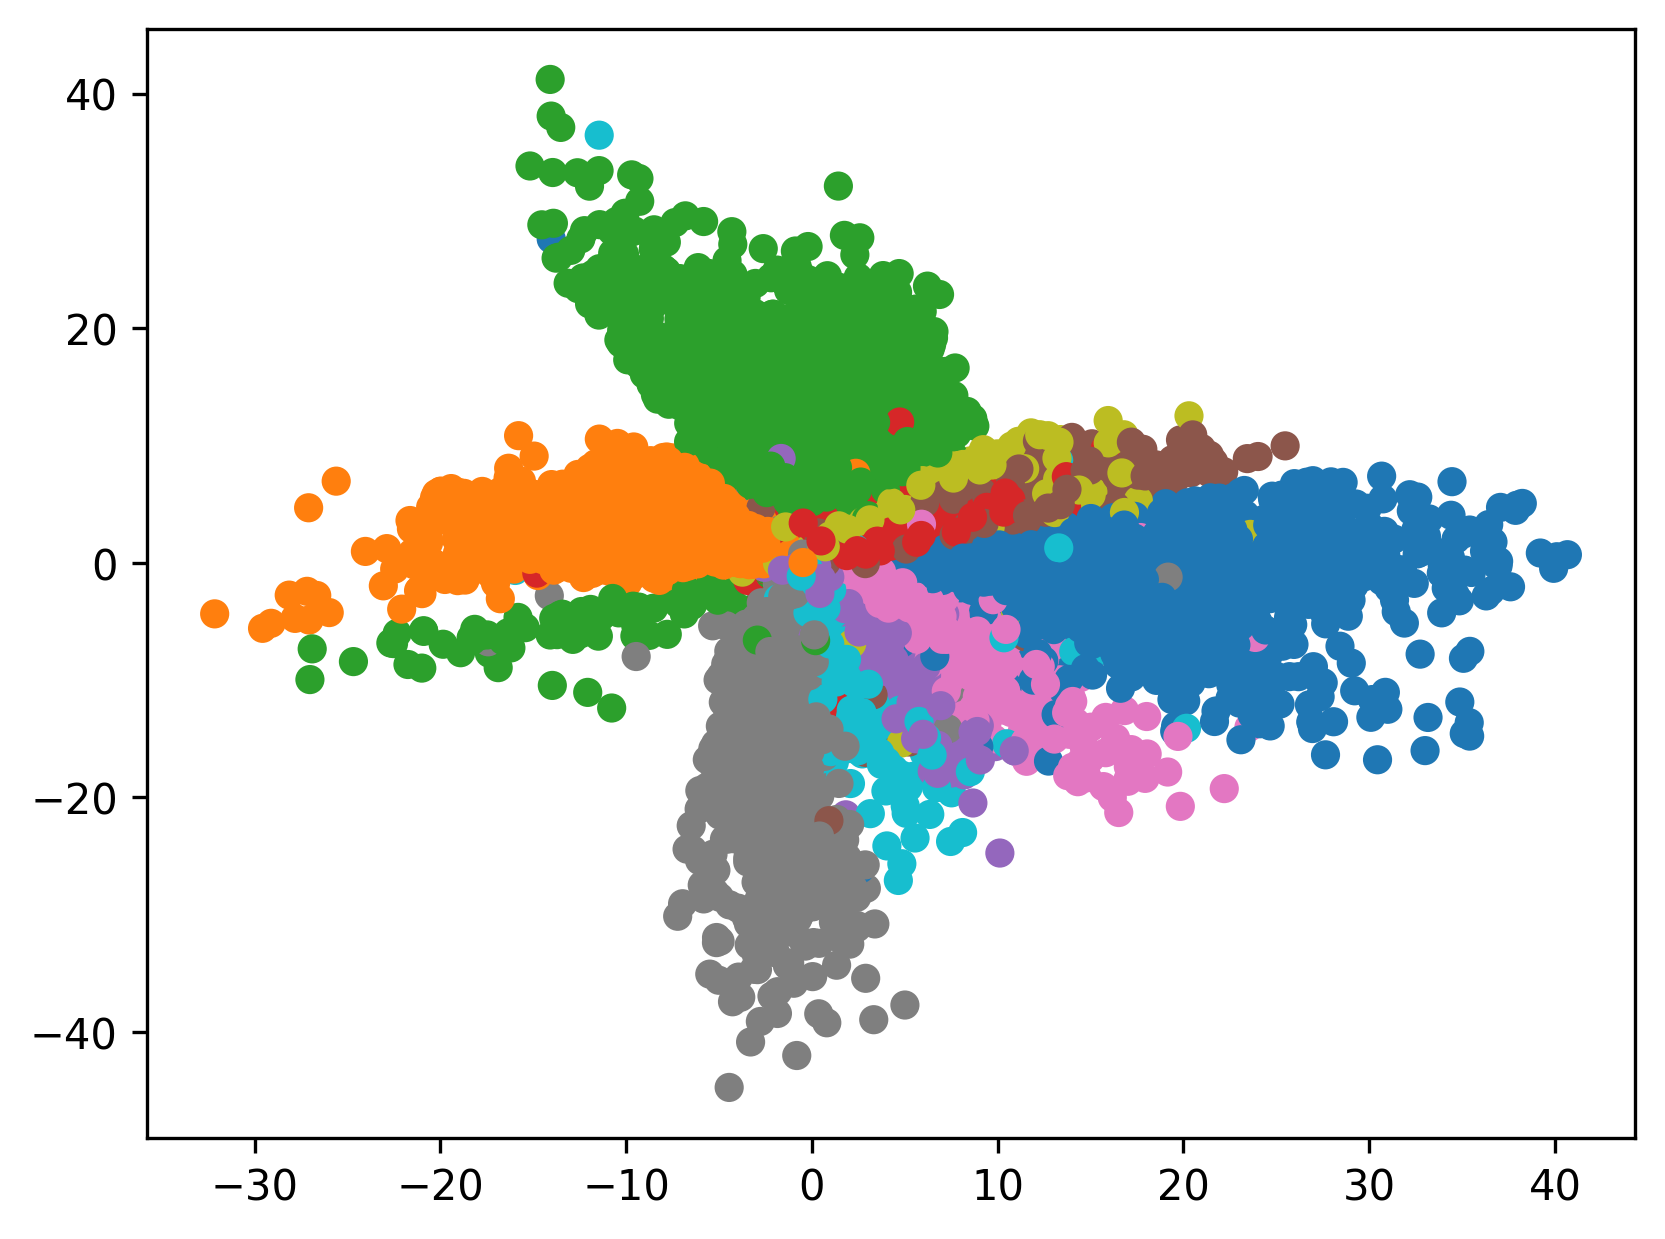

In [12]:
plot_latent(autoencoder,data)

In [13]:
def plot_reconstructed(autoencoder,r0=(-5,10),r1=(-10,5),n=12):
    w=28
    img=np.zeros((n*w,n*w))
    for i,y in enumerate(np.linspace(*r1,n)):
        for j,x in enumerate(np.linspace(*r0,n)):
            z=torch.Tensor([[x,y]]).to(device)
            x_hat=autoencoder.decoder(z)
            print(x_hat.shape)
            x_hat=x_hat.reshape(28,28).to('cpu').detach().numpy()
            img[(n-1-i)*w:(n-1-i+1)*w,j*w:(j+1)*w]=x_hat
    plt.imshow(img,extent=[*r0,*r1])

torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
t

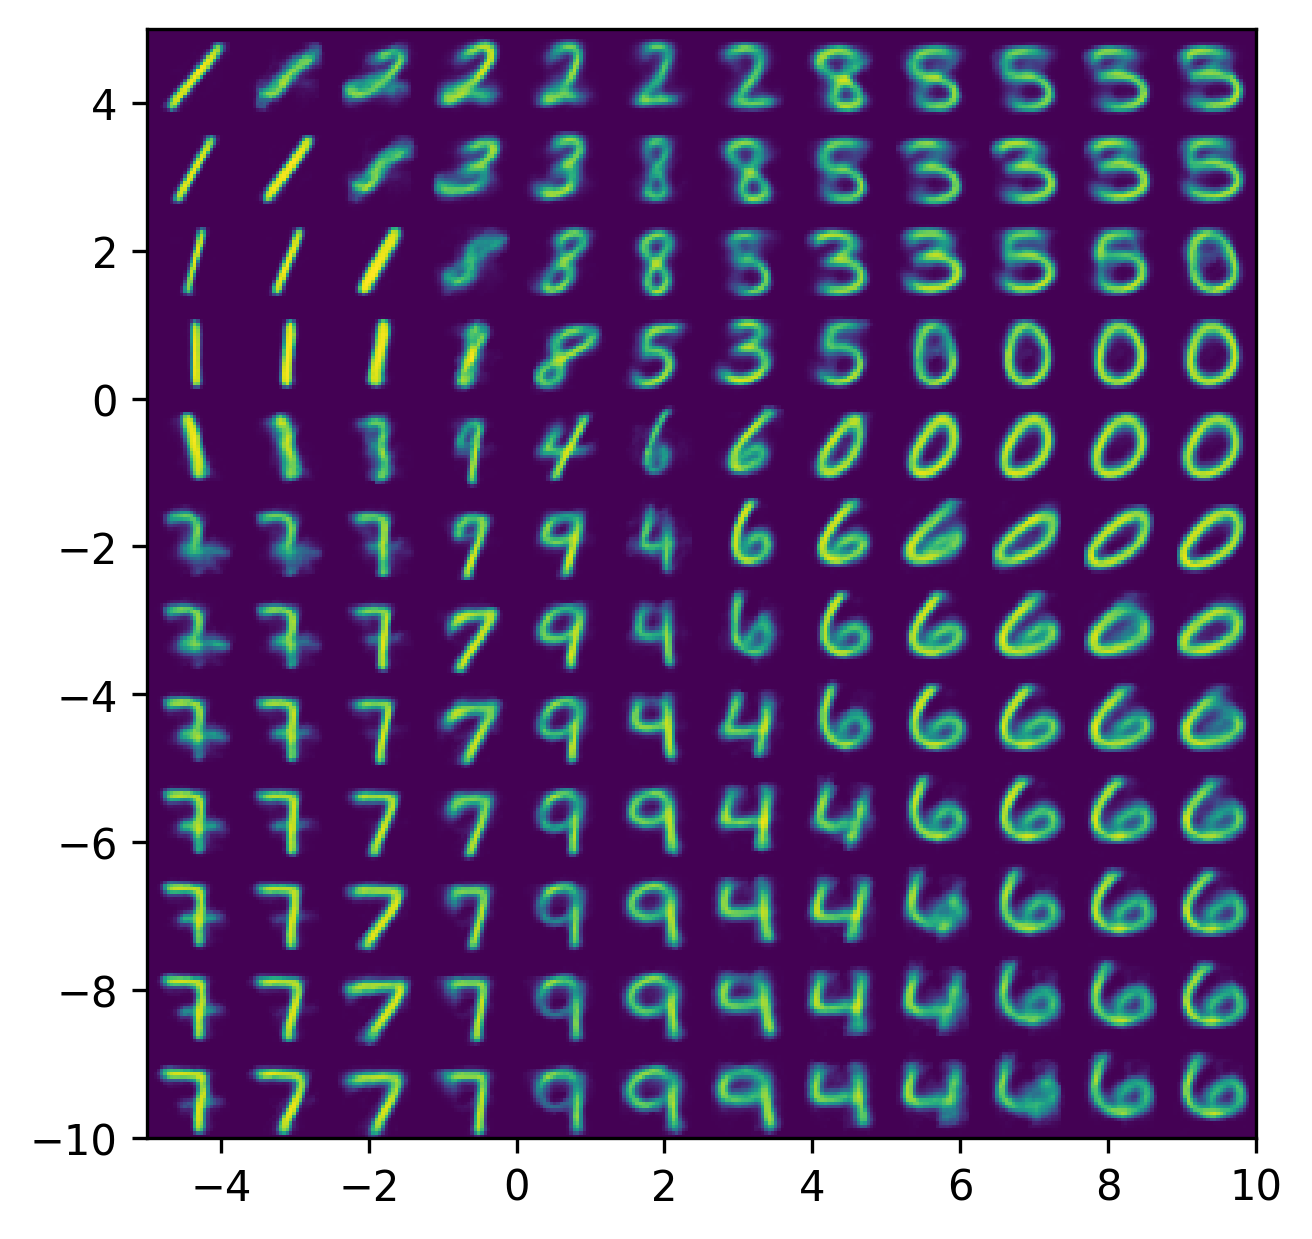

In [14]:
plot_reconstructed(autoencoder)

Variational Autoencoders

In [15]:
class VariationalEncoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalEncoder, self).__init__()
        self.linear1 = nn.Linear(784, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 128)
        self.linear4_mu = nn.Linear(128, latent_dims)   # For mu
        self.linear4_log_var = nn.Linear(128, latent_dims)   # For log variance

        self.N = torch.distributions.Normal(0, 1)
        self.N.loc = self.N.loc.cuda()
        self.N.scale = self.N.scale.cuda()
        self.kl = 0
    
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = F.gelu(self.linear1(x))
        x = F.gelu(self.linear2(x))
        x = F.gelu(self.linear3(x))
        mu = self.linear4_mu(x)
        log_var = self.linear4_log_var(x)  # Getting the log variance first for stability reasons
        sigma = torch.exp(0.5 * log_var)  # Using exp and 0.5 multiplier to get standard deviation
        z = mu + sigma * self.N.sample(mu.shape)
        self.kl = (0.5 * (sigma**2 + mu**2 - log_var - 1)).sum()  # Updated KL divergence calculation
        return z

In [16]:
class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(latent_dims)
        self.decoder = Decoder(latent_dims)
    
    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [17]:
def train(variationalautoencoder, data, epochs=20):
    opt = torch.optim.Adam(variationalautoencoder.parameters())
    for epoch in range(epochs):
        for x, y in data:
            x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = variationalautoencoder(x)
            loss = ((x - x_hat)**2).sum() + variationalautoencoder.encoder.kl
            loss.backward()
            opt.step()
    return variationalautoencoder

In [18]:
variationalautoencoder = VariationalAutoencoder(latent_dims).to(device) # GPU
variationalautoencoder = train(variationalautoencoder, data)

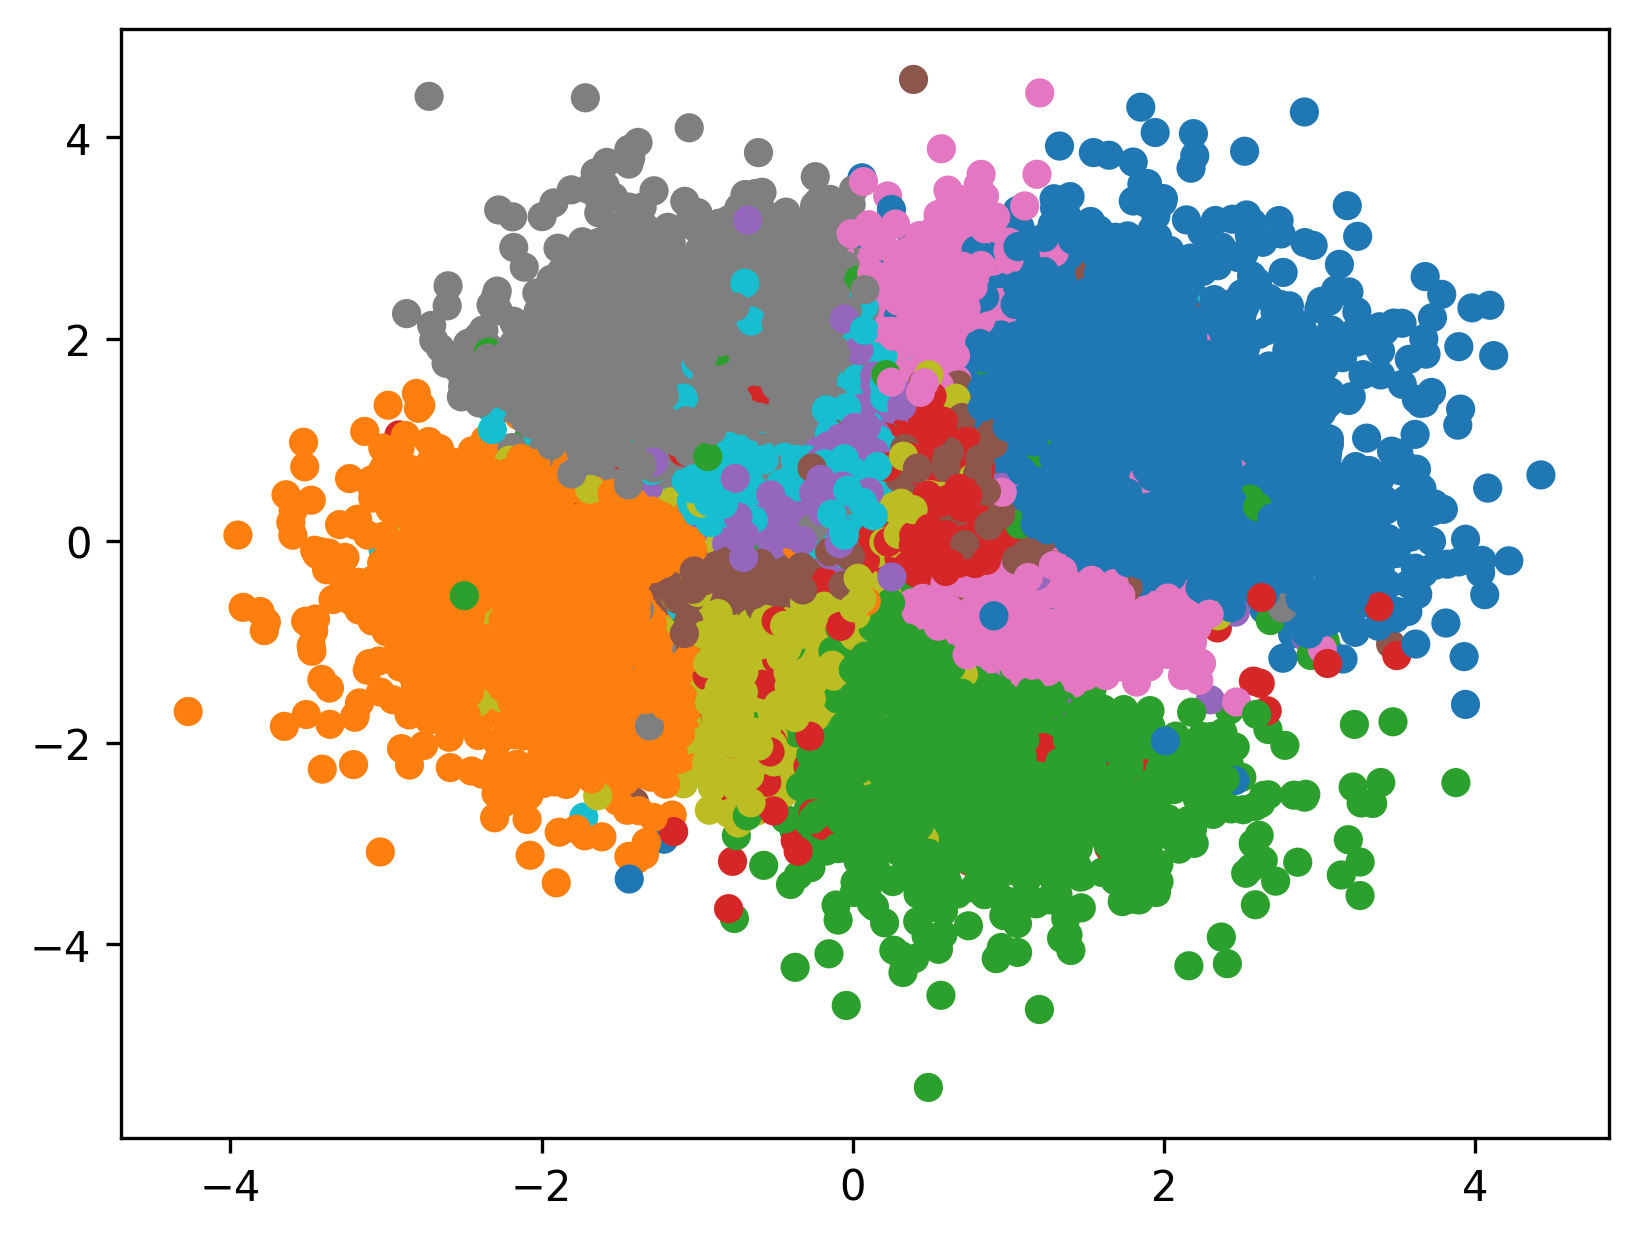

In [19]:
plot_latent(variationalautoencoder, data)


torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
torch.Size([1, 1, 28, 28])
t

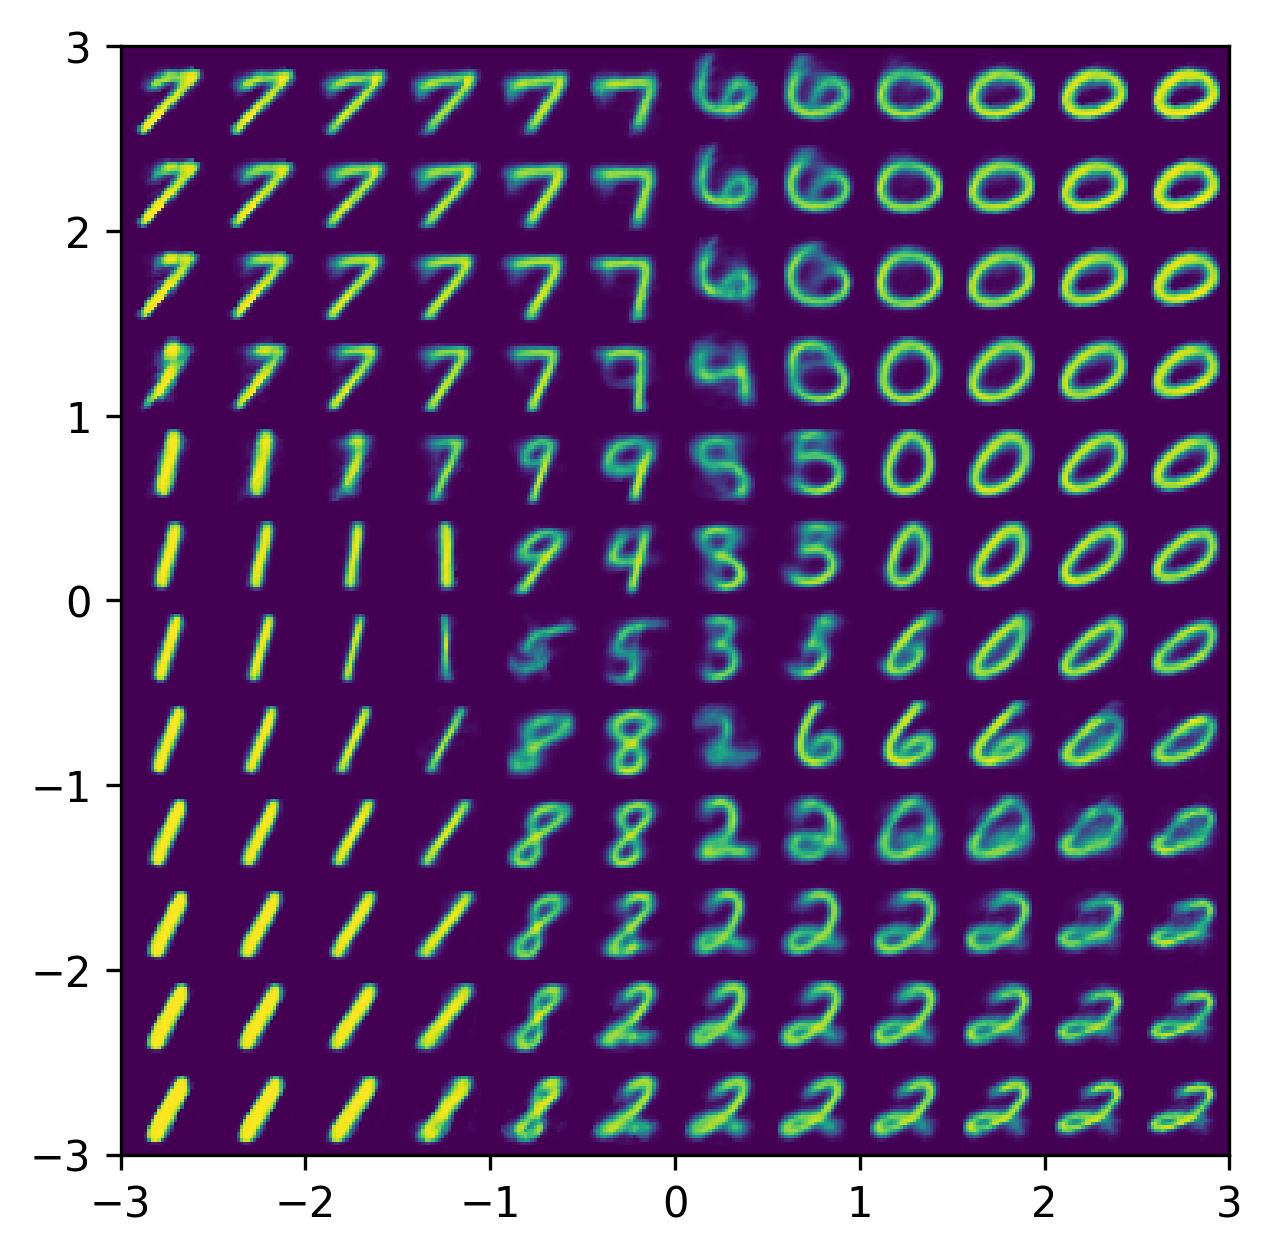

In [20]:
plot_reconstructed(variationalautoencoder, r0=(-3, 3), r1=(-3, 3))

In [24]:
def interpolate(autoencoder,x_1,x_2,n=12):
    z_1=autoencoder.encoder(x_1)
    z_2=autoencoder.encoder(x_2)
    z=torch.stack([z_1+(z_2-z_1)*t for t in np.linspace(0,1,n)])
    interpolate_list=autoencoder.decoder(z)
    interpolate_list=interpolate_list.to('cpu').detach().numpy()

    w=28
    img=np.zeros((w,n*w))
    for i,x_hat in enumerate(interpolate_list):
        img[:,i*w:(i+1)*w]=x_hat.reshape(28,28)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])

In [25]:
x,y=next(data.__iter__())
x_1=x[y==1][1].to(device)
x_2=x[y==0][1].to(device)

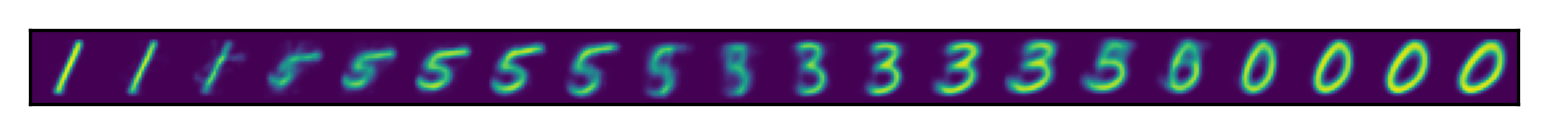

In [26]:
interpolate(variationalautoencoder,x_1, x_2,n=20)

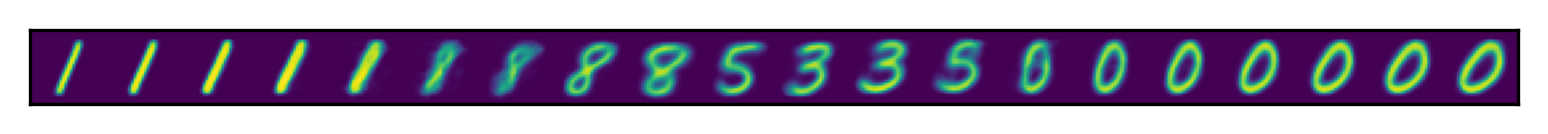

In [27]:
interpolate(autoencoder, x_1, x_2, n=20)